In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset1 dim32

In [2]:
""" Step 1: Load the data points and ground truth values (Some ground truth values may be in a different file) """
#======= 1. Dataset_1/S1.txt: N=5000 vectors and k=15 Gaussian cluster =======#

# s5 dataset
s5 = pd.read_csv(r'Part1_data\dataset_2\dim32.txt', header = None, delim_whitespace=True)
s5.shape
s5.columns

colnames = []
for i in range(s5.shape[1]):
    colnames.append('X' + str(i))

s5.columns = colnames
    
#1 s5 labels
s5_l = pd.read_csv(r'Part1_data\dataset_2\dim32_ground_truth.txt')
s5_l.head()
s5_l.shape
s5_l.columns
s5_l.info()
s5_l.describe()
    
# combine the X data and y_true label as a new dataframe
s5['Label'] = s5_l
s5 = s5.fillna(s5.mean().astype(int))
s5.Label = s5.Label.astype(int)

s5.shape
s5.head()
s5.apply(pd.to_numeric).head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 1 columns):
1    1023 non-null int64
dtypes: int64(1)
memory usage: 8.1 KB


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X23,X24,X25,X26,X27,X28,X29,X30,X31,Label
0,84,152,100,52,95,186,169,106,37,186,...,65,214,116,75,55,123,65,154,177,1
1,86,149,101,56,93,181,171,116,37,192,...,79,215,116,76,60,130,71,151,181,1
2,83,149,99,51,96,187,169,108,34,191,...,65,213,118,73,55,125,63,155,178,1
3,86,142,101,64,105,183,172,116,49,180,...,69,209,120,68,56,123,67,144,181,1
4,89,145,108,54,91,180,175,107,35,192,...,67,212,118,91,50,135,58,147,165,1


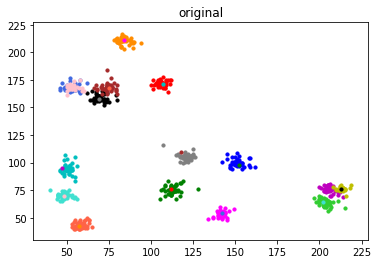

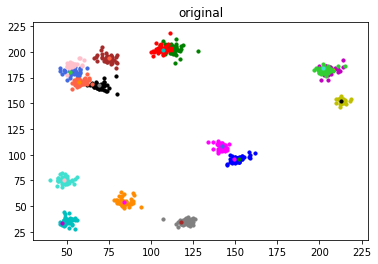

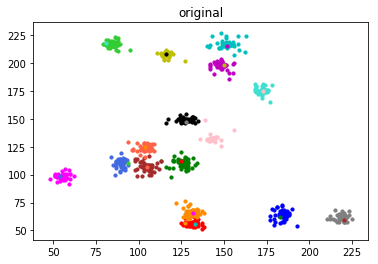

In [3]:
# supervised plot of all points using given label and centroids


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'grey','brown','tomato','darkorange','magenta','royalblue','limegreen','turquoise', 'pink']
plt.figure()
for i in range(1, 17):
    plt.scatter(s5.X1[s5.Label == i], s5.X2[s5.Label == i], s=10, c=colors[i-1]) # color is repeated, use unique colors
plt.title('original')
plt.show()

plt.figure()
for i in range(1, 17):
    plt.scatter(s5.X1[s5.Label == i], s5.X4[s5.Label == i], s=10, c=colors[i-1]) # color is repeated, use unique colors
plt.title('original')
plt.show()

plt.figure()
for i in range(1, 17):
    plt.scatter(s5.X5[s5.Label == i], s5.X29[s5.Label == i], s=10, c=colors[i-1]) # color is repeated, use unique colors
plt.title('original')
plt.show()

In [4]:
""" Step 3: Split data into train and test. """
from sklearn.model_selection import train_test_split

X = s5
y = s5.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

### knn

In [5]:
""" Step 4 (2 pts): Use KNN (own NumPy code & sklearn library) to clusters the data."""
# function 1. Euclidean Distance function between two rows
def euclidean_distance(row1, row2): 
    """This function returns the Euclidean Distance between two rows"""
    
    # this converts to np.arrays nn case that data sets are not converted
    row1, row2 = np.array(row1), np.array(row2)
    
    distance = 0
    for i in range(len(row1)):     #-1
        # sum of squared differences
        distance += np.square(row1[i] - row2[i])
    # return the square root of the sum
    return np.sqrt(distance)

#test code for func 2
X_train[0, :-1]
X_test[0, :-1]
euclidean_distance(X_train[0, :-1], X_test[0, :-1])

# function 2. predicting the class of a test row using knn algorithm
def predict(k, train_set, test_instance): #here we are defining our model
    """This function returns the nearest neighbors
        train_set: training data set that includes labels
        test_instance: a row in the test set that also include its label
        k: number of neighborhoods
    """
    # this converts to np.arrays nn case that data sets are not converted
    train_set = np.array(train_set)
    test_instance = np.array(test_instance)
    
    l = len(train_set)

    # empty list to store distances of each row in train set vs a row in test set
    distances = []
    for i in range(l): # -1
        # find the distance between each row of train set and the test instance (a single row)
        dist = euclidean_distance(train_set[i, :-1], test_instance)
        # append the row from train set and its distance to the test instance
        distances.append((train_set[i], dist))
        
    # sort the distances list by dist
    distances.sort(key = lambda x: x[1])
    
    # empty list to store k nearest neighbors
    neighbors = []    
    for i in range(k):
        # append the rows from train set in distances to neighborhoods
        neighbors.append(distances[i][0])
        
    # determine the class of a test instance
    classes = {}
    for i in range(len(neighbors)):
        # 
        response = neighbors[i][-1]
        
        # 
        if response in classes:
            classes[response] += 1
        # 
        else:
            classes[response] = 1
            
    # sort the values in classes in descending order
    sorted_classes = sorted(classes.items(), key = lambda x: x[1], reverse = True)
    
    # return the one has the highest vote
    return(sorted_classes[0][0])


# function 3. evaluate the model and returns accuracy
def evaluate(y_true, y_pred):
    """returns % of correct prediction"""
    
    # number of correct predictions
    correct = 0
    
    # iterate over 2 arrays at the same time
    for actual, pred in zip(y_true, y_pred):
        # if
        if actual == pred:
            correct += 1
    
    # accuray
    return str(np.round(correct /len(y_true)*100 ,2)) + '%'
## end of functions of KNN ##

## clustering
# empty list to store predictions
k = 16
y_pred = []
for i in range(len(X_test)):
    predictor = X_test[i, :-1]
    prediction = predict(k, X_train, predictor)
    y_pred.append(prediction)

# true labels
actual = np.array(y_test)
# evaluation
evaluate(actual, y_pred)


# KNN using sci-kit learn
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
y_knn = knn.predict(X_test)

In [16]:
 # new arrays without labels
X_tr = X_train[:, :-1]
X_te = X_test[:, :-1]

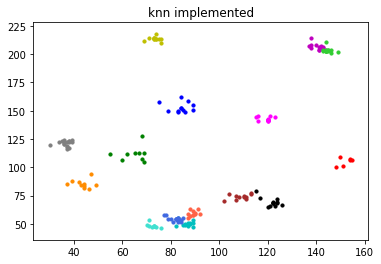

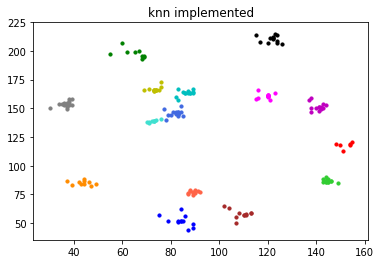

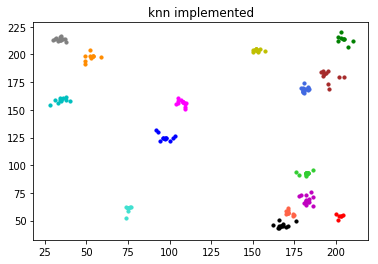

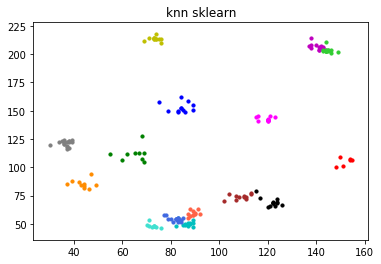

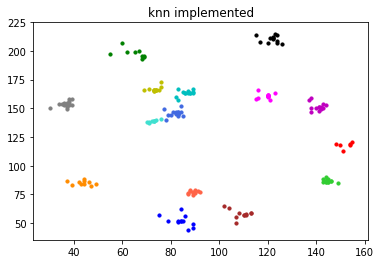

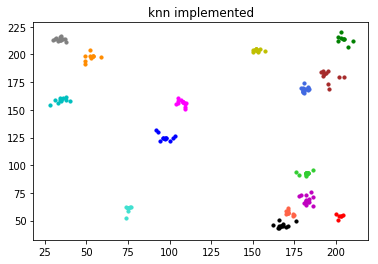

In [6]:
""" Step 5 (1 pts): Plot your result in different colors similar to Step 2. """


# this is a plot of the test set
plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_pred) == i], X_te[:, 1][np.array(y_pred) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_pred) == i], X_te[:, 3][np.array(y_pred) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 4][np.array(y_pred) == i], X_te[:, 28][np.array(y_pred) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_knn) == i], X_te[:, 1][np.array(y_knn) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn sklearn')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 0][np.array(y_knn) == i], X_te[:, 3][np.array(y_knn) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn implemented')
plt.show()

plt.figure()
for i in range(1, 16):
    plt.scatter(X_te[:, 4][np.array(y_knn) == i], X_te[:, 28][np.array(y_knn) == i], s=10, c = colors[i-1]) # color is repeated, use unique colors
plt.title('knn implemented')
plt.show()

In [7]:
""" Step 6 (1 pts): Print the confusion matrix to check model performance. """
from sklearn.metrics import confusion_matrix
# cm_own
cm_own = confusion_matrix(y_test, y_pred) # y_pred is from my implementation
print(cm_own)
print(np.sum(np.diag(cm_own))/len(X_test))
print('\n')
# cm_sklearn
cm_knn = confusion_matrix(y_test, y_knn) # y_knn is from sklearn 
print(cm_knn)
print(np.sum(np.diag(cm_knn))/len(X_test))

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 17  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 19]]
0.9658536585365853


[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  

### kmeans

In [21]:
"""Step 7 (4 pts): Repeat Steps 3 - 6 and use K-means (own NumPy code & sklearn library) to
perform the same. Additionally, print the centroids."""
from copy import deepcopy


######## same as step 3 but kmeans #########
K = 16 # Number of clusters
n = X_te.shape[0] # rows
c = X_te.shape[1] # cols except label
n,c

(205, 32)

In [22]:
######## same as step 4 but kmeans #########
# random centroids
mean = np.mean(X_te, axis = 0)
std = np.std(X_te, axis = 0)
centroids = np.random.randn(K,c)*std + mean
centroids_old = np.zeros(centroids.shape) # to store old centroids
centroids_new = deepcopy(centroids) # Store new centroids
clusters = np.zeros(n)
distances = np.zeros((n,K))

# find the error between the old and new centroids
error = np.linalg.norm(centroids_new - centroids_old)
#error

# When, after an update, the estimate of that center stays the same, exit loop

# number of iterations
n_iterations = 100

while n_iterations > 0:
    # Measure the distance to every center
    for i in range(K):
        distances[:,i] = np.linalg.norm(X_te - centroids_new[i], axis=1)
    
    # use minimum distance as reference to allocate data to the closest center
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)
    # Calculate mean for every cluster and update the center
    for i in range(K):
        centroids_new[i] = np.mean(X_te[clusters == i], axis=0)
    error = np.linalg.norm(centroids_new - centroids_old)
    
    print(error)
    n_iterations -= 1
    
print('\n new centroids:')
print(centroids_new)
print('\n')
## sklearn 

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 16, init = 'k-means++', random_state = 0)
kmeans.fit(X_train, y_train)
y_kmeans = kmeans.predict(X_test)
len(y_kmeans)
np.min(y_kmeans)
np.max(y_kmeans)

# relabeling by majority vote
y_kmeans_voted = y_kmeans.copy()
for i in range(0, 16):
    n = np.argmax(np.bincount(y_test[y_kmeans == i]))
    print(i, 'in y_kmeans is', n, 'in y_test')
    y_kmeans_voted[y_kmeans == i] = n

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan

 new centroids:
[[ 94.57560976 109.74146341 113.6        127.63414634 139.06341463
  130.53658537 145.76097561 137.27804878  94.82439024 134.67317073
  135.5804878  136.49756098 120.22439024 119.26341463 121.25853659
  127.94634146 143.68292683 136.55609756 122.45853659 130.16097561
  133.77560976 103.49756098 124.05853659 155.18536585 125.0195122
  118.50243902 101.06341463 119.96585366 131.89756098 133.67804878
  113.34146341 112.7804878 ]
 [         nan          nan          nan          nan          nan
           nan          nan          nan          nan          nan
           nan     

C:\Users\ytjya\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ytjya\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


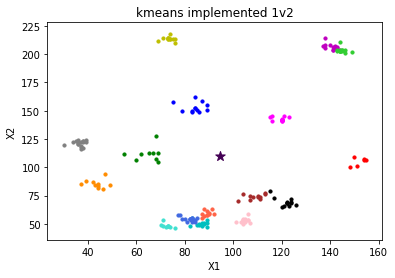

In [24]:
######## same as step 5 but kmeans #########
plt.figure()
for i in range(1, 17):
    plt.scatter(X_te[:, 0][y_kmeans_voted == i], X_te[:, 1][y_kmeans_voted == i], s=10, c = colors[i-1])
plt.scatter(centroids_new[:,0], centroids_new[:,1], marker='*', c=range(1,17), s=100)
plt.title('kmeans implemented 1v2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

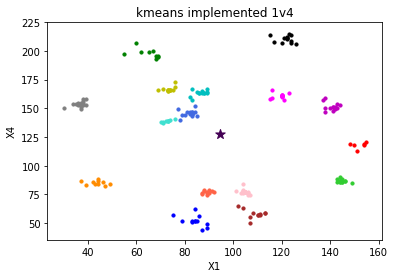

In [25]:
######## same as step 5 but kmeans #########
plt.figure()
for i in range(1, 17):
    plt.scatter(X_te[:, 0][y_kmeans_voted == i], X_te[:, 3][y_kmeans_voted == i], s=10, c = colors[i-1])
plt.scatter(centroids_new[:,0], centroids_new[:,3], marker='*', c=range(1,17), s=100)
plt.title('kmeans implemented 1v4')
plt.xlabel('X1')
plt.ylabel('X4')
plt.show()

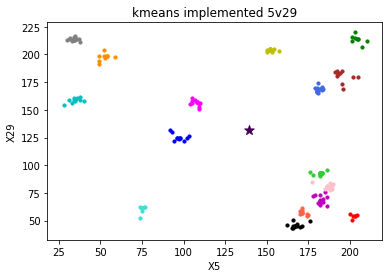

In [26]:
######## same as step 5 but kmeans #########
plt.figure()
for i in range(1, 17):
    plt.scatter(X_te[:, 4][y_kmeans_voted == i], X_te[:, 28][y_kmeans_voted == i], s=10, c = colors[i-1])
plt.scatter(centroids_new[:, 4], centroids_new[:, 28], marker='*', c=range(1,17), s=100)
plt.title('kmeans implemented 5v29')
plt.xlabel('X5')
plt.ylabel('X29')
plt.show()

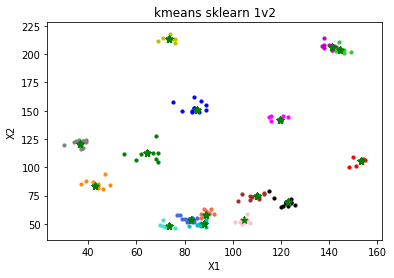

In [29]:
# Plot sklearn
plt.figure()
for i in range(1,17):
    plt.scatter(X_te[y_kmeans_voted == i, 0], X_te[y_kmeans_voted == i, 1], s = 10, c = colors[i-1], label = 'Cluster')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 50, c = 'green', label = 'Centroids')
plt.title('kmeans sklearn 1v2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

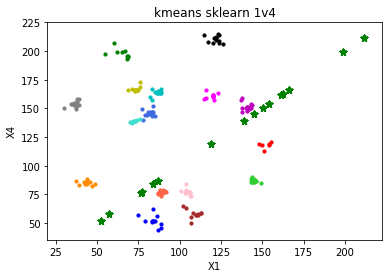

In [30]:
# Plot sklearn
plt.figure()
for i in range(1,17):
    plt.scatter(X_te[y_kmeans_voted == i, 0], X_te[y_kmeans_voted == i, 3], s = 10, c = colors[i-1], label = 'Cluster')
    plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 3], marker='*', s = 50, c = 'green', label = 'Centroids')
plt.title('kmeans sklearn 1v4')
plt.xlabel('X1')
plt.ylabel('X4')
plt.show()

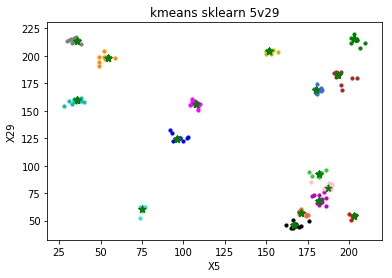

In [31]:
# Plot sklearn
plt.figure()
for i in range(1,17):
    plt.scatter(X_te[y_kmeans_voted == i, 4], X_te[y_kmeans_voted == i, 28], s = 10, c = colors[i-1], label = 'Cluster')
    plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 28], marker='*', s = 50, c = 'green', label = 'Centroids')
plt.title('kmeans sklearn 5v29')
plt.xlabel('X5')
plt.ylabel('X29')
plt.show()

In [11]:
######## same as step 6 but kmeans #########
# confusion matrix
cm_kmeans = confusion_matrix(y_test, y_kmeans_voted)
print(cm_kmeans)
np.sum(np.diag(cm_kmeans))/len(X_test)

[[12  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 13  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 17  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 12  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 18  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 15  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 19]]


0.9658536585365853

In [12]:
"""Step 8 (1pts): Compare the results between KNN and K-means"""
# KNN and KMeans are very similar.
# Both have the right clusters and the right centroids whereas KNN has higher accuracy in predicting centroids and clusters.

'Step 8 (1pts): Compare the results between KNN and K-means'